In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [12]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')
df_svm_16q_ct = pd.read_csv('../ML_results/SVM/svm_16q_circuit_tt.csv')

df_knn_4q = pd.read_csv('../ML_results/KNN/knn_4q.csv')
df_knn_8q = pd.read_csv('../ML_results/KNN/knn_8q.csv')
df_knn_16q_ct = pd.read_csv('../ML_results/KNN/knn_16q_circuit_tt.csv')
print(type(df_knn_16q_ct))

<class 'pandas.core.frame.DataFrame'>


select the circuit table tests

In [26]:
df_svm_4q = df_svm_4q[df_svm_4q['tr&v circuits'] != 111]
df_svm_8q = df_svm_8q[df_svm_8q['tr&v circuits'] != 111]

df_svm_4q_ct = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_4q,False)
df_svm_8q_ct = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_8q,False)

knn_4q_8q = [df_knn_4q,df_knn_8q]
knn_4q_8q = mvf.apply_condition_to_dfs(knn_4q_8q,'tr&v circuits',111,equals=False)
knn_4q_8q_ct = mvf.apply_get_same(knn_4q_8q,'tr&v exp_type','test exp_type',drop_same_cols=False)

knn_ct = knn_4q_8q_ct
knn_ct.append(df_knn_16q_ct)

## Train c1

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c23 = 011

In [27]:
df_svm_4q_ct1 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==100]
df_svm_8q_ct1 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==100]
df_svm_16q_ct1 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==100]

knn_ct1 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',100)

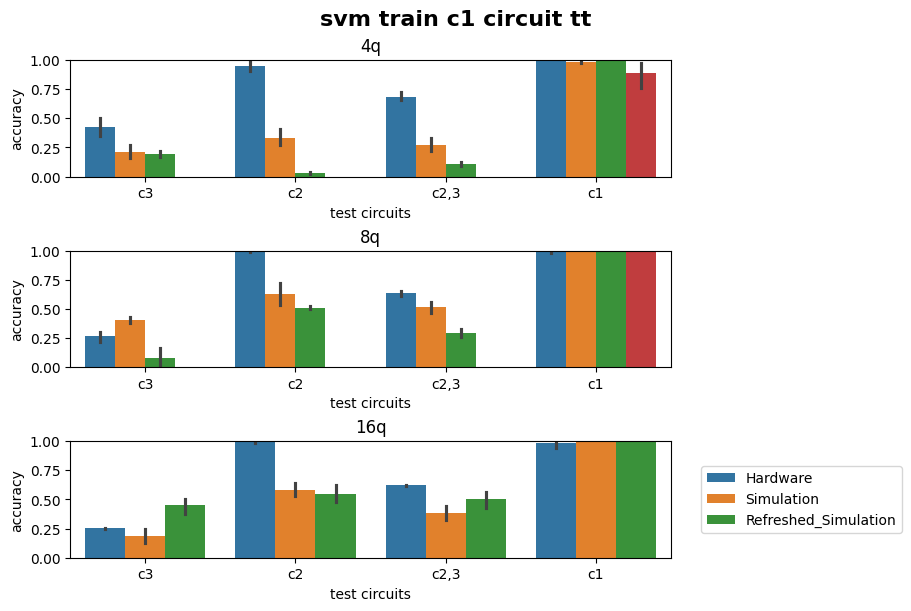

In [ ]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct1,df_svm_8q_ct1,df_svm_16q_ct1,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c1 circuit tt', nr_cat =4,
    labels_ = labels
)

### Observation
In general accuracy is higher with more qubits.

C1 on C1 is the genreally highest accuracy over all experiment types.
Testing on C2 has a much higher accuracy than testing on c3. This makes sense becuase c1 and c2 are very similar circuits.

Theoretically, the c2,c3 results are the average of the the c2 and c3 results. This shpuld be calculated and tested.

Generally cross-circuit accuracy by experiment type in descending order is Hardware, Simulation, Refreshed Simulation. - double check which mode was used for these runs


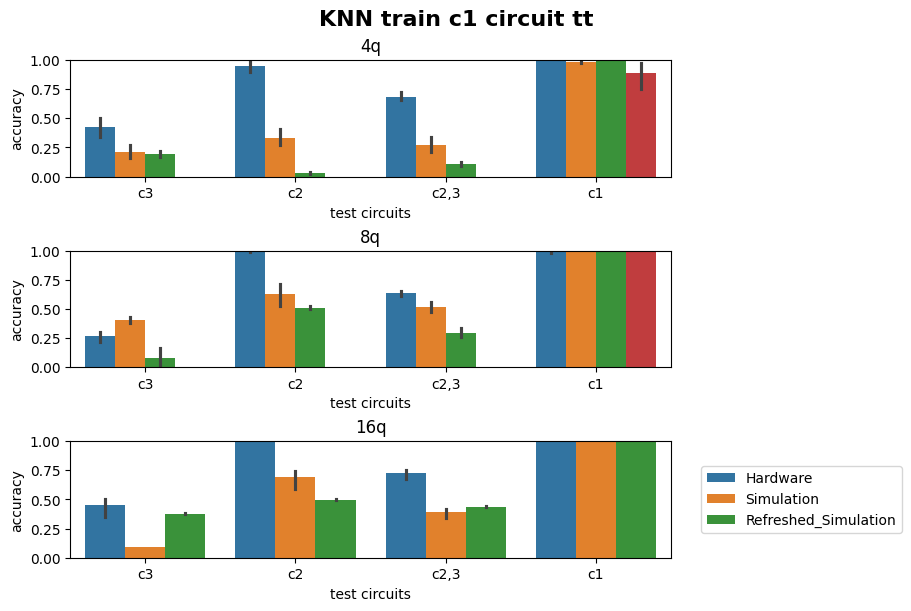

In [30]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    knn_ct1[0],knn_ct1[1],knn_ct1[2],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c1 circuit tt', nr_cat =4,
    labels_ = labels
)

### KNN comparisons

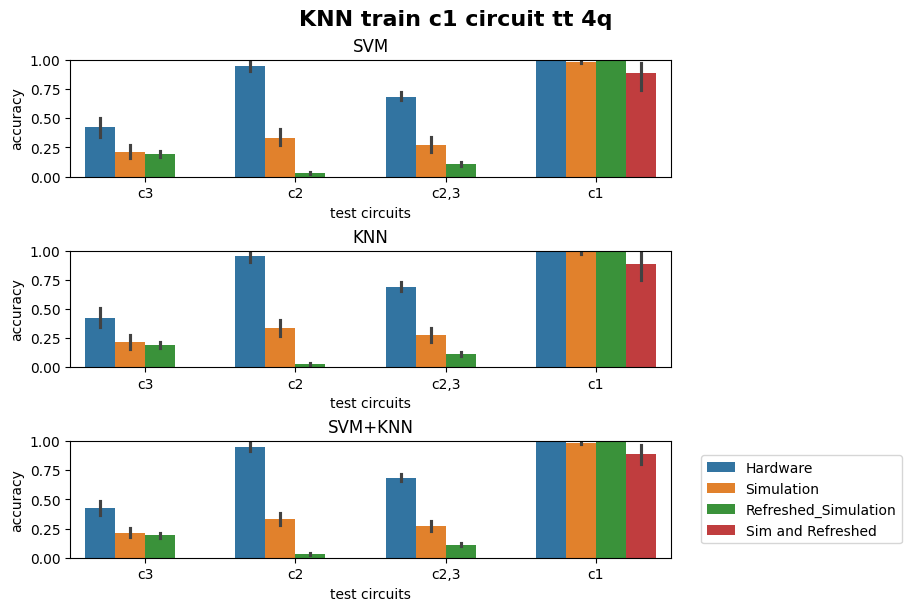

In [33]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct1,knn_ct1[0],pd.concat([df_svm_4q_ct1,knn_ct1[0]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c1 circuit tt 4q', nr_cat =4,
    labels_ = labels,
    df_titles_=['SVM','KNN','SVM+KNN']
)

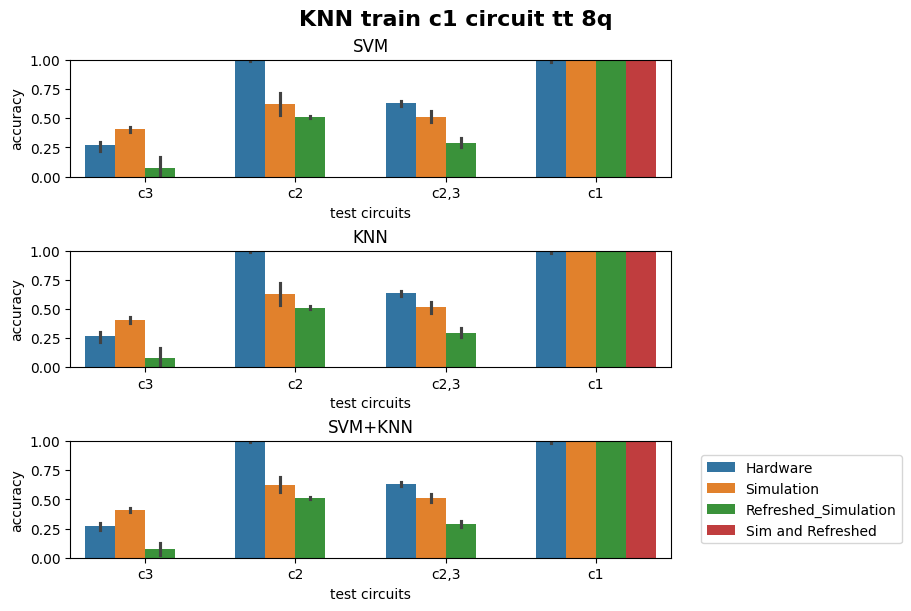

In [34]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    df_svm_8q_ct1,knn_ct1[1],pd.concat([df_svm_8q_ct1,knn_ct1[1]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c1 circuit tt 8q', nr_cat =4,
    labels_ = labels,
    df_titles_=['SVM','KNN','SVM+KNN']
)

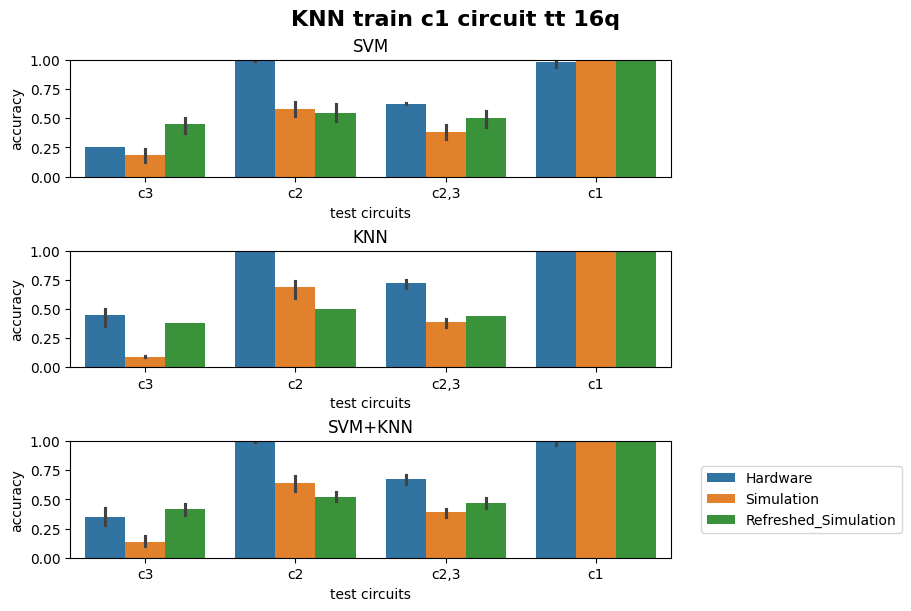

In [32]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    df_svm_16q_ct1,knn_ct1[2],pd.concat([df_svm_16q_ct1,knn_ct1[2]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c1 circuit tt 16q', nr_cat =4,
    labels_ = labels,
    df_titles_=['SVM','KNN','SVM+KNN']
)

## Train c2

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c1,3 = 101

In [37]:
df_svm_4q_ct2 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']== 10]
df_svm_8q_ct2 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']== 10]
df_svm_16q_ct2 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==10]

knn_ct2 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',10)
labels_c2 = ["c3","c2","c1","c1,3"]

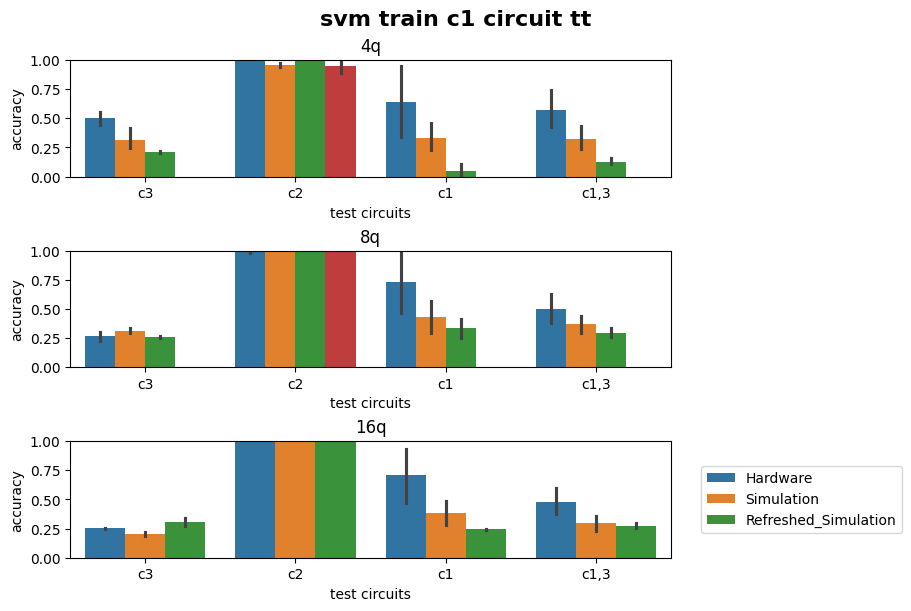

In [ ]:

mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct2,df_svm_8q_ct2,df_svm_16q_ct2,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c1 circuit tt', nr_cat =4,
    labels_ = labels_c2
)

### Observation
In general accuracy is higher with 8 qubits than 4 qubits, again. The refreshed simulation in particular performs better with more qubits. ... what would that mean?

C2 on C2 is the highest accuracy over all experiment types.
Testing on C1 has a higher accuracy than testing on c3. This makes sense becuase c1 and c2 are very similar circuits. But this difference is less noticeable when trained on C2 - possibly because C2 has more gates so is more generalised?

Theoretically, the c1,c3 results are the average of the the c1 and c3 results. This should be calculated and tested.

Generally accuracy by experiment type in descending order is Hardware, Simulation, Refreshed Simulation. - double check which mode was used for these runs

### KNN comparisons

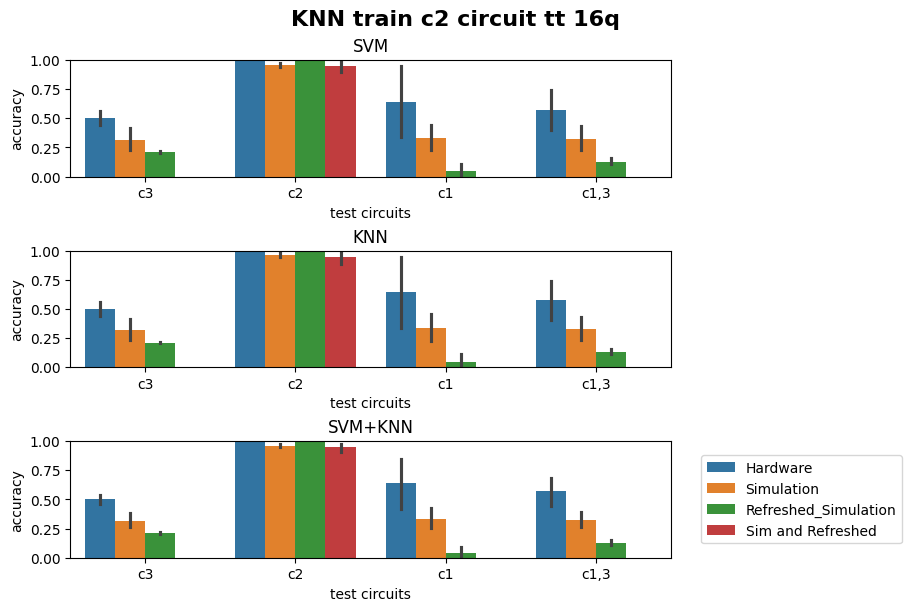

In [38]:

mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct2,knn_ct2[0],pd.concat([df_svm_4q_ct2,knn_ct2[0]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c2 circuit tt 16q', nr_cat =4,
    labels_ = labels_c2,
    df_titles_=['SVM','KNN','SVM+KNN']
)

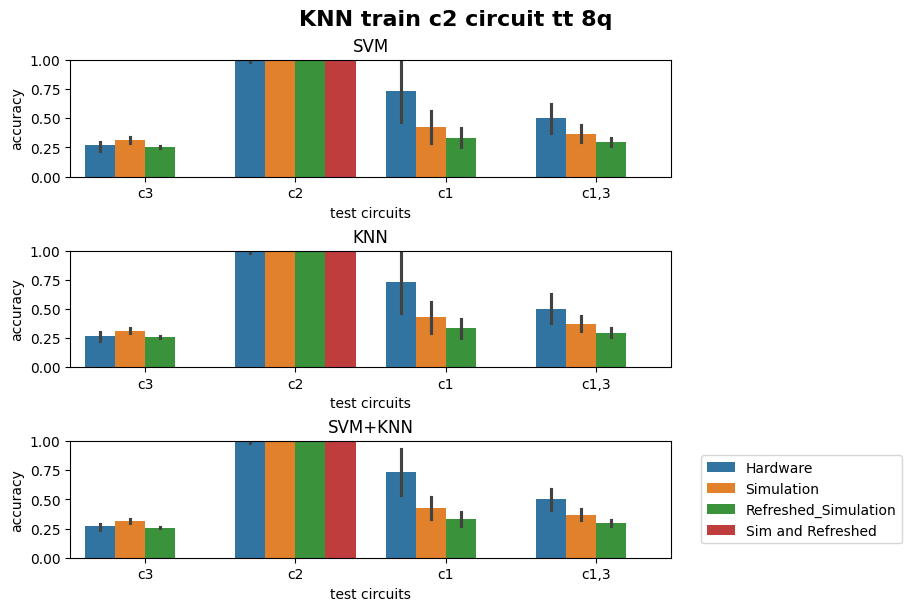

In [39]:

mvf.plot_bar_per_qubit_nr(
    df_svm_8q_ct2,knn_ct2[1],pd.concat([df_svm_8q_ct2,knn_ct2[1]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c2 circuit tt 8q', nr_cat =4,
    labels_ = labels_c2,
    df_titles_=['SVM','KNN','SVM+KNN']
)

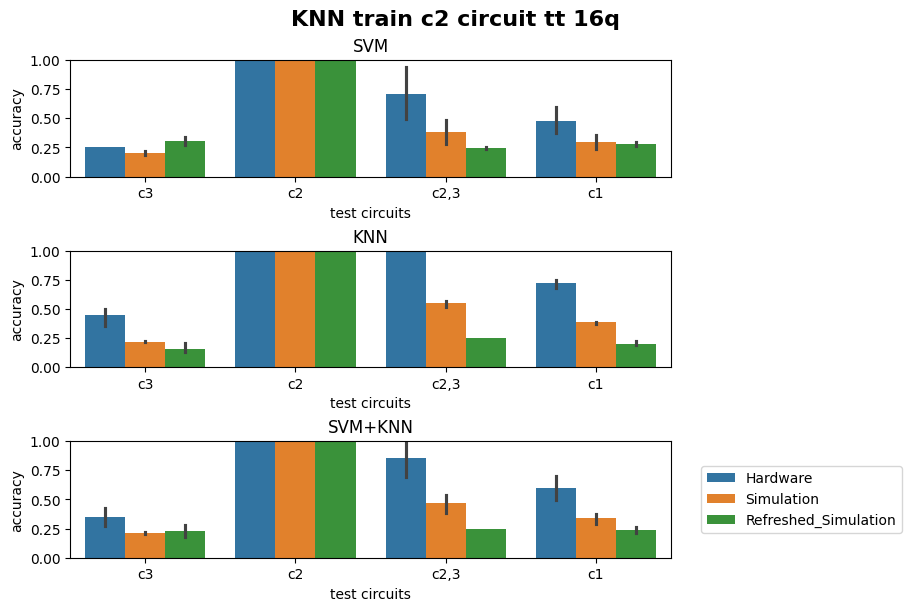

In [ ]:
mvf.plot_bar_per_qubit_nr(
    df_svm_16q_ct2,knn_ct2[2],pd.concat([df_svm_16q_ct2,knn_ct2[2]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c2 circuit tt 16q', nr_cat =4,
    labels_ = labels_c2,
    df_titles_=['SVM','KNN','SVM+KNN']
)

## Train c3

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c1,2 = 110

In [40]:
df_svm_4q_ct3 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']== 1]
df_svm_8q_ct3 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']== 1]
df_svm_16q_ct3 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==1]

knn_ct3 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',1)
labels_c3 = ["c3","c2","c1","c1,2"]

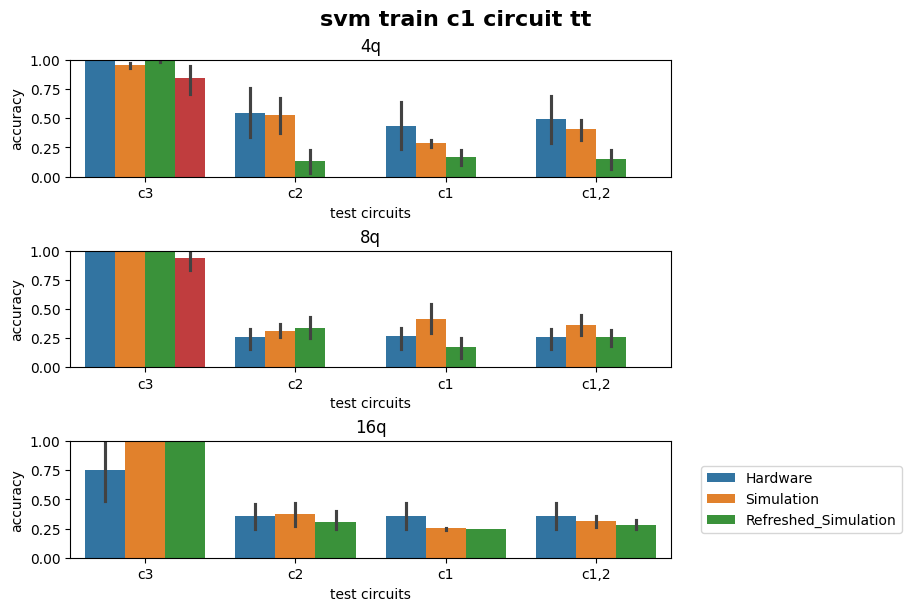

In [ ]:

mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct3,df_svm_8q_ct3,df_svm_16q_ct3,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c1 circuit tt', nr_cat =4,
    labels_ = labels_c3
)

### Observation
In general accuracy is higher with 8 qubits than 4 qubits for c3 on c3, but for testing on any of the other circuits, accuracy is higher with 4 qubits. 

Strangely Hardware performs a lot better with 4 qubits than 8 qubits. And hardware c3 on c3 performs terribly (~75%).
The In the 8 qubit regime, Simulation performs the best, but is probably still a downgrade from 4q Simulation accuracy. Weirdly Refreshed simulation is the only mode that improves with the 8q runs.

Theoretically, the c1,c3 results are the average of the the c1 and c3 results. This should be calculated and tested.

### KNN comparison

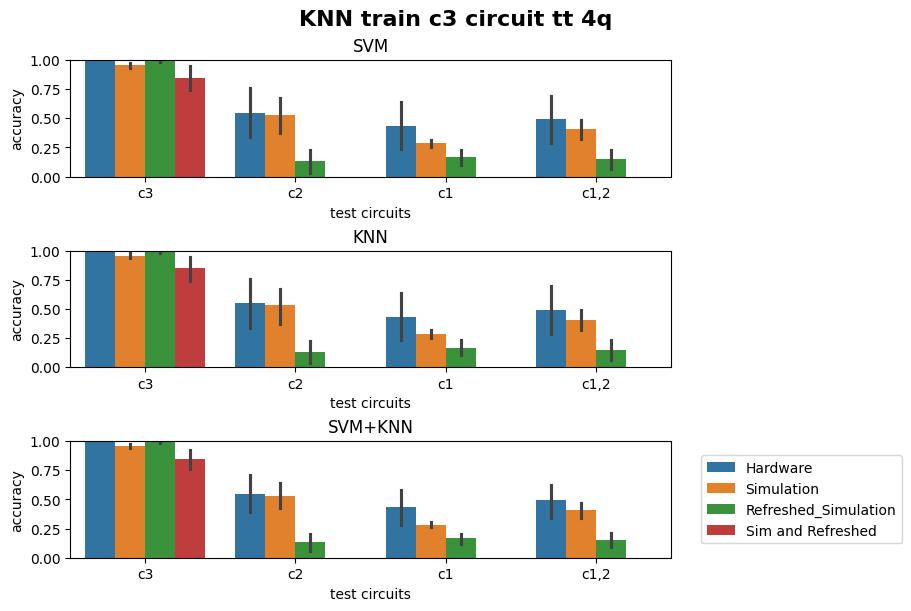

In [41]:
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct3,knn_ct3[0],pd.concat([df_svm_4q_ct3,knn_ct3[0]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c3 circuit tt 4q', nr_cat =4,
    labels_ = labels_c3,
    df_titles_=['SVM','KNN','SVM+KNN']
)

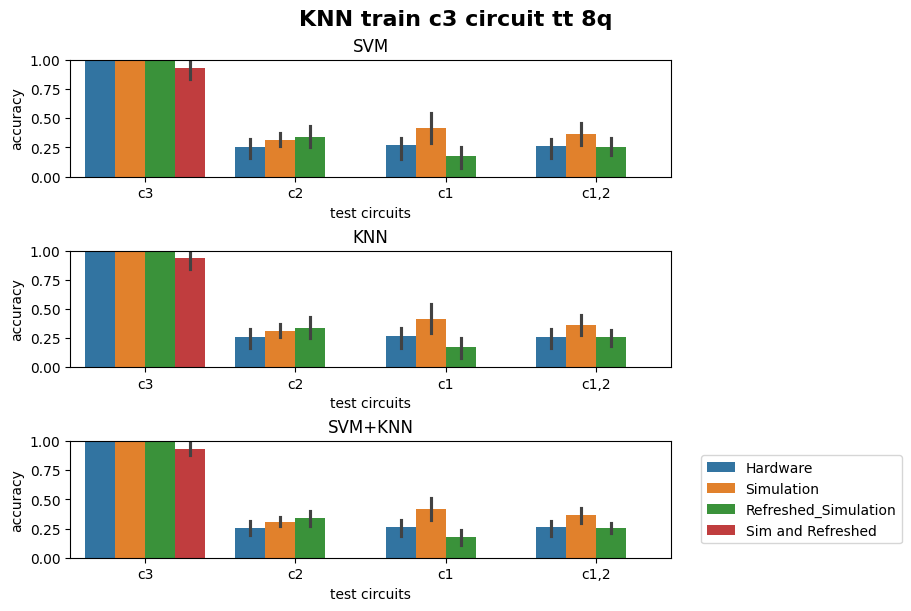

In [42]:
mvf.plot_bar_per_qubit_nr(
    df_svm_8q_ct3,knn_ct3[1],pd.concat([df_svm_8q_ct3,knn_ct3[1]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c3 circuit tt 8q', nr_cat =4,
    labels_ = labels_c3,
    df_titles_=['SVM','KNN','SVM+KNN']
)

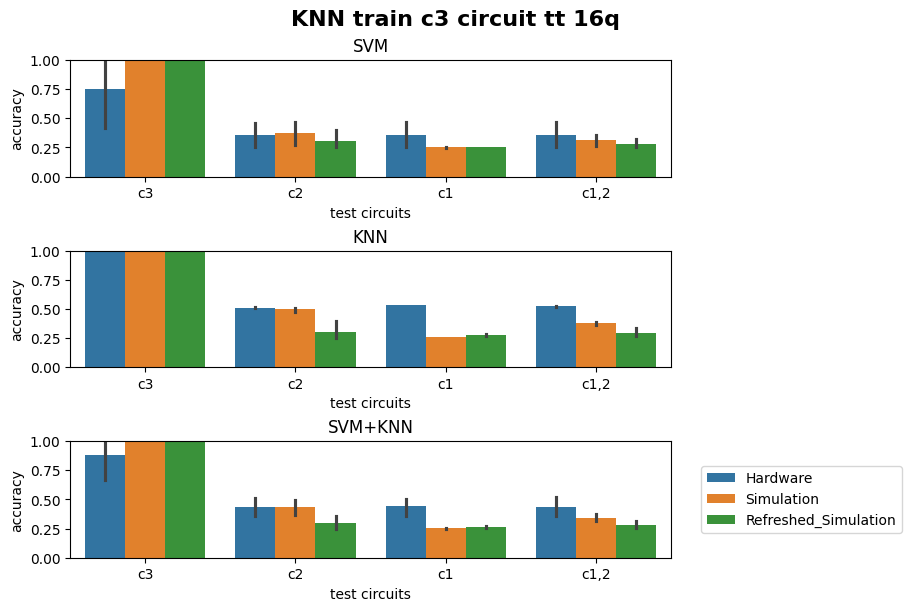

In [43]:
mvf.plot_bar_per_qubit_nr(
    df_svm_16q_ct3,knn_ct3[2],pd.concat([df_svm_16q_ct3,knn_ct3[2]]),
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c3 circuit tt 16q', nr_cat =4,
    labels_ = labels_c3,
    df_titles_=['SVM','KNN','SVM+KNN']
)

## Train on 2 circuits, test on 1

In [44]:
#train_list =[110, 101, 11]
df_svm_4q_ct12 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==110]
df_svm_8q_ct12 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==110]
df_svm_16q_ct12 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==110]
knn_ct12 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',110)

df_svm_4q_ct13 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==101]
df_svm_8q_ct13 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==101]
df_svm_16q_ct13 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==101]
knn_ct13 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',101)

df_svm_4q_ct23 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==11]
df_svm_8q_ct23 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==11]
df_svm_16q_ct23 = df_svm_16q_ct[df_svm_16q_ct['tr&v circuits']==11]
knn_ct23 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',11)

### 4 qubits:

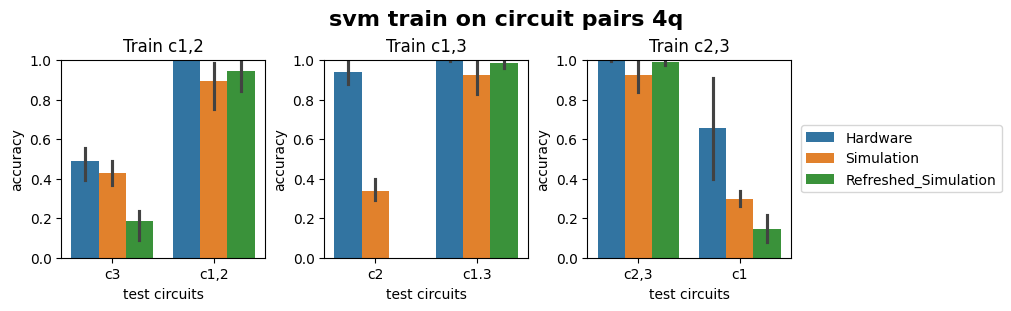

In [12]:
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_ct12,df_svm_4q_ct13,df_svm_4q_ct23,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train on circuit pairs 4q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
    # fig_size_=(10,3)
)

### KNN comparisons

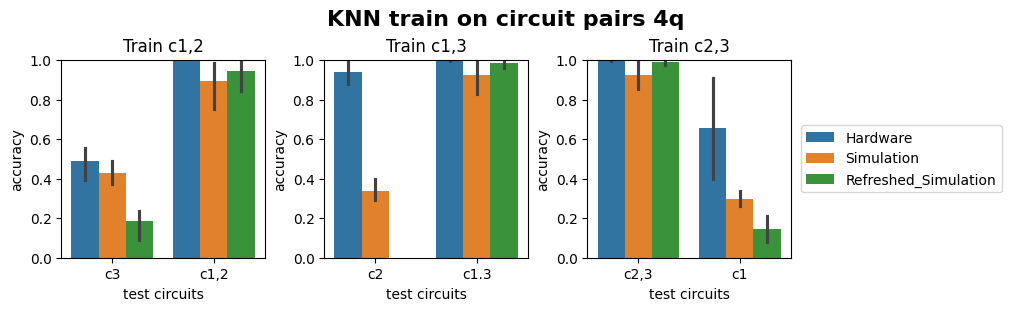

In [45]:
mvf.plot_bar_per_qubit_nr(
    knn_ct12[0],knn_ct13[0],knn_ct23[0],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train on circuit pairs 4q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
    # fig_size_=(10,3)
)

### 8 qubits:

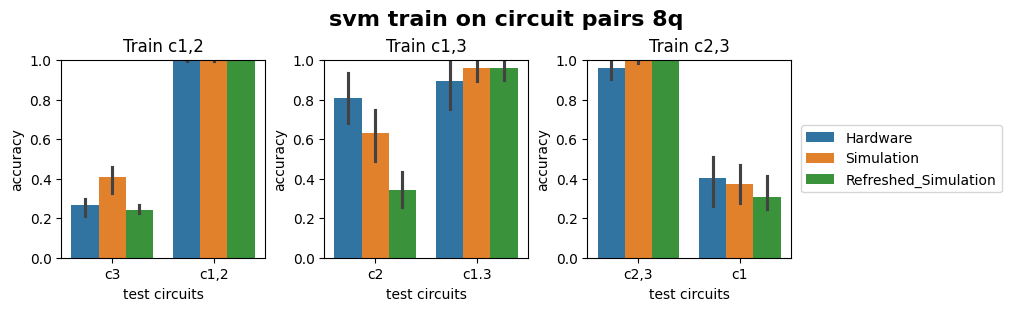

In [13]:
mvf.plot_bar_per_qubit_nr(
    df_svm_8q_ct12,df_svm_8q_ct13,df_svm_8q_ct23,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train on circuit pairs 8q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
)

### KNN comparison

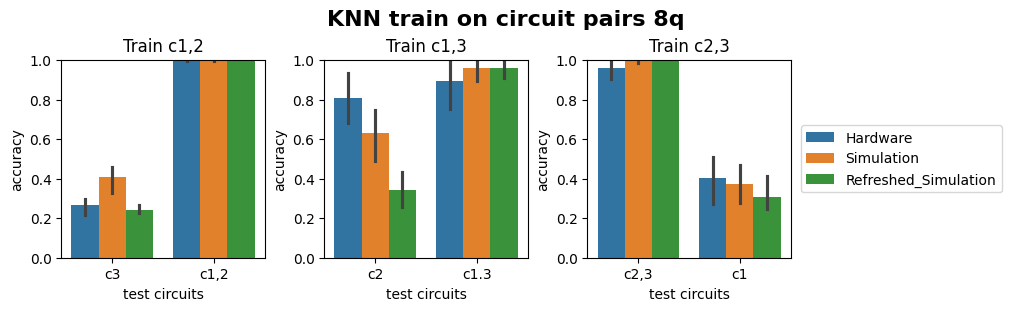

In [46]:
mvf.plot_bar_per_qubit_nr(
    knn_ct12[1],knn_ct13[1],knn_ct23[1],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train on circuit pairs 8q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
    # fig_size_=(10,3)
)

### 16 qubits:

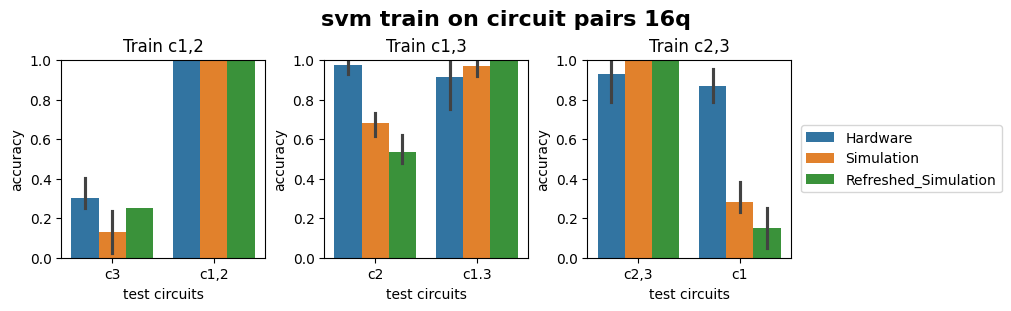

In [14]:
mvf.plot_bar_per_qubit_nr(
    df_svm_16q_ct12,df_svm_16q_ct13,df_svm_16q_ct23,
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train on circuit pairs 16q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
)

### KNN comparison

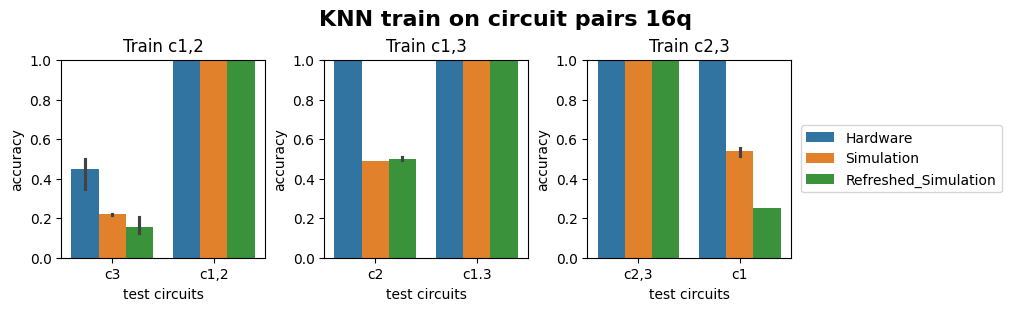

In [47]:
mvf.plot_bar_per_qubit_nr(
    knn_ct12[2],knn_ct13[2],knn_ct23[2],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train on circuit pairs 16q', nr_cat =2,
    df_titles_=["Train c1,2","Train c1,3","Train c2,3"],
    share_cat_labels=False, 
    plot1_labels=["c3","c1,2"], plot2_labels=["c2","c1.3"], plot3_labels=["c2,3","c1"],
    horizontal_stack=True
    # fig_size_=(10,3)
)

### General Observations

Training on c1 and c3 has the best cross-accuracy out of all the training pairs for each number of qubits. Weirdly though, the self-accuracy decreases below the cross accuracy as the number of qubits increases.

Training on c2,3 only achieves high cross-accuracy with 16q.

The training pair always performs better in cross accuracy when c3 is in the mix, probably becuase the results are more generalised compared to combining c1 and c2 which probably have very similar results so a sort of over-fitting occurs.

The highest cross-accuracies are with hardware.